# <center>CUSTOMER SEGMENTATION PROJECT

## Introduction

This is a project about analyzing the customer behaviors of a photography company. The company wants me to group customers into segments to understand high level trends better by providing insights on metrics across product/service and customer lifecycle.   

The data is provided by the company. I will start with importing necessary libraries and reading the data into a DataFrame.

In [272]:
# import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import datetime as dt

In [273]:
# read training data to a DataFrame df
df  = pd.read_excel('customers.xlsx')

## 1. Data Wrangling and Exploratory Data Analysis (EDA)

The company puts importance on privacy of the company and also its customers. So, I am going to check the column names first before printing out any part of the data to keep privacy.

In [274]:
# print columns information
print('\n DataFrame Column Names: \n\n', df.columns)


 DataFrame Column Names: 

 Index(['Fatura No', 'Fatura Tarihi', 'İsim', 'Soy İsim', 'Müşteri No',
       'Fotoğraf Türü', 'Tutar', 'Düşünceler'],
      dtype='object')


Note that the column names are in a different language. Not part of the original analysis, but let me translate them to English, so that it makes sense to all. I also added explanations where necessary to provide better understanding of this project. Here, I use 'Inv' as an acronym for 'invoice' and 'Cust' for 'customer'.

In [275]:
df.columns = ['Inv_No', 'Inv_Date', 'name', 'lastname', 'Cust_ID', 'Photo_Type', 'Amount', 'Notes']

In [276]:
# check the result and get some info on the data.
print('\n DataFrame Information: \n') 
df.info()


 DataFrame Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98572 entries, 0 to 98571
Data columns (total 8 columns):
Inv_No        98572 non-null int64
Inv_Date      98572 non-null object
name          98572 non-null object
lastname      98572 non-null object
Cust_ID       98572 non-null int64
Photo_Type    91173 non-null object
Amount        98572 non-null float64
Notes         93946 non-null object
dtypes: float64(1), int64(2), object(5)
memory usage: 6.0+ MB


This is the customer dataset of the photography company. There are 8 columns and 98,572 rows in the dataset. I have 5 columns of datatype string, 1 of float and 2 of integer. Columns 'Photo_Type' and 'Notes' have missing values. The columns are:

- 'Inv_No' - unique integer number for each transaction.
- 'Inv_Date' - a string type data storing the time of the transaction (I will convert to type datetime).
- 'name' - a string type data storing the name of the customer. 
- 'lastname' - a string type data storing the lastname of the customer.
- 'Cust_ID' - unique integer number for identifying the customers by number.
- 'Photo_Type' - a string type data that describes the types of pictures taken.
- 'Amount' - a float number that shows the amount paid by the customer for the transaction.
- 'Notes' - a string type data storing any notes on the transaction.

There is redundancy in columns. Since 'Cust_ID' provides enough information on the reviewers, I am going to drop the 'name' and 'lastname' columns in order to take care of the redundancy and keep privacy of the customers who provided the reviews to the company. 

In [277]:
df.drop(['name', 'lastname'], axis=1, inplace=True)

print('\n \n First 5 Rows of the DataFrame:')
df.head()


 
 First 5 Rows of the DataFrame:


,Inv_No,Inv_Date,Cust_ID,Photo_Type,Amount,Notes
0,43891,01/01/2016,16106,amatör,29.78,Co k acele
1,43892,01/01/2016,10570,pasaport,32.94,"Acele, bir an once yapilamli"
2,43893,01/01/2016,13796,vesikalık.,29.45,Bizim
3,43894,01/01/2016,10246,Okul,23.94,Liste -- oncelikli
4,43895,01/01/2016,5158,pasaport,23.58,Tanidik


I am not interested in notes on transactions for my analysis. So, I can drop it, too.

In [278]:
df.drop(['Notes'], axis=1, inplace=True)
df.head()

,Inv_No,Inv_Date,Cust_ID,Photo_Type,Amount
0,43891,01/01/2016,16106,amatör,29.78
1,43892,01/01/2016,10570,pasaport,32.94
2,43893,01/01/2016,13796,vesikalık.,29.45
3,43894,01/01/2016,10246,Okul,23.94
4,43895,01/01/2016,5158,pasaport,23.58


To make more sense of the data, it's time to look at 'Photo_Type' column. The type of photos may be of interest:

In [279]:
# make entries lowercase and remove dots
df['Photo_Type'] = df['Photo_Type'].str.lower()
df['Photo_Type'] = df['Photo_Type'].str.strip('.')

In [280]:
df['Photo_Type'].value_counts()

vesikalık    15287
amatör       15254
pasaport     15203
okul         15168
düğün        15082
nişan         7608
dış çekim     7571
Name: Photo_Type, dtype: int64

Translation of the 'Photo_Type' column thru the help of a "dictionary":

In [281]:
dict = {'vesikalık':'official',
        'amatör':'self_taken',
        'pasaport':'passport',
        'okul':'school',
        'düğün':'wedding',
        'nişan':'engagement',
        'dış çekim':'outdoors'
        }
df['Photo_Type'] = df['Photo_Type'].map(dict)
df.head()

,Inv_No,Inv_Date,Cust_ID,Photo_Type,Amount
0,43891,01/01/2016,16106,self_taken,29.78
1,43892,01/01/2016,10570,passport,32.94
2,43893,01/01/2016,13796,official,29.45
3,43894,01/01/2016,10246,school,23.94
4,43895,01/01/2016,5158,passport,23.58


In [282]:
# Looking at summary statistics
print('\n Summary Statistics:'); df['Amount'].describe()


 Summary Statistics:


count    98572.000000
mean       331.195788
std        427.601356
min         10.030000
25%         36.447500
50%        183.105000
75%        396.105000
max       4301.420000
Name: Amount, dtype: float64

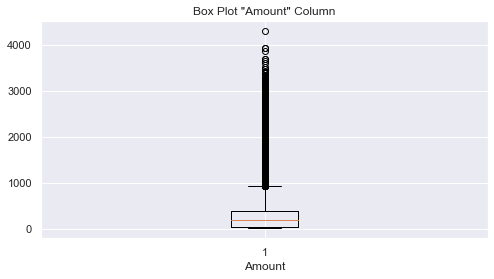

In [283]:
# box plot
plt.boxplot(df['Amount'])
plt.title('Box Plot "Amount" Column')
plt.xlabel('Amount')
plt.show()

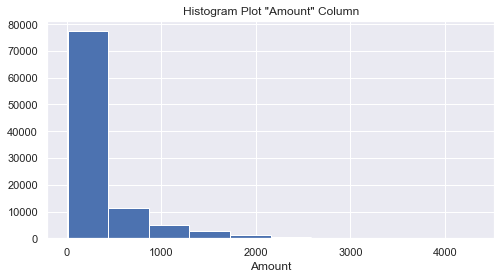

In [284]:
# histogram
plt.hist(df['Amount'])
plt.title('Histogram Plot "Amount" Column')
plt.xlabel('Amount')
plt.show()

Mean of the sales amount is 331.2. Standard deviation is 427.6. The minimum value is 10.03, and maximum is 4301.42.

Exploring other columns:

In [285]:
print('Number of unique Customer IDs:', df['Cust_ID'].nunique())
print('Number of unique Invoice Numbers:', df['Inv_No'].nunique())
print('Number of unique Invoice Dates:', df['Inv_Date'].nunique())
print('Number of unique Photo Types:', df['Photo_Type'].nunique())

Number of unique Customer IDs: 14414
Number of unique Invoice Numbers: 98572
Number of unique Invoice Dates: 360
Number of unique Photo Types: 7


- Number of unique customers being less than number of rows shows that there are returning customers. 
- Invoice numbers are equal to number of rows (no duplications). 
- Invoice dates cover around a year.
- There are 7 unique photo types.

In [286]:
print('Number of missing values: \n', df.isnull().sum())

Number of missing values: 
 Inv_No           0
Inv_Date         0
Cust_ID          0
Photo_Type    7399
Amount           0
dtype: int64


Initial exploratory analysis indicates some problems with the data:

1. The 'Photo_Type' column is missing 7399 rows.
2. The 'Inv_Date' is of type string that needs to be converted to a DateTime object.

First, since the number of rows having missing values is a small fraction of the dataset, I will drop those rows.

Second, I will convert the 'Inv_Date' column to DateTime object.

In [287]:
# drop the rows with missing values
df.dropna(axis=0, how='any', inplace = True)

# convert 'Inv_Date' to DateTime
df['Inv_Date'] =  pd.to_datetime(df['Inv_Date'], format='%m/%d/%Y')

# confirm changes
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91173 entries, 0 to 98571
Data columns (total 5 columns):
Inv_No        91173 non-null int64
Inv_Date      91173 non-null datetime64[ns]
Cust_ID       91173 non-null int64
Photo_Type    91173 non-null object
Amount        91173 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.2+ MB
None


## 2. Cohort Analysis

### Building Time Cohorts

Here, I am going to build time cohorts. To facilitate, I will extract month values from the data to do calculations. 

In [288]:
# function truncating a date object to first day of the month
def get_month (x):
    return dt.datetime(x.year, x.month, 1)

# apply the function to 'Inv_Date' column and save as 'Inv_Month' column
df['Inv_Month'] = df['Inv_Date'].apply(get_month)

# assign the smallest 'Inv_Month' value to each customer
grouping = df.groupby('Cust_ID')['Inv_Month']
df['Cohort_Month'] = grouping.transform('min')

# check random 5 rows of the DataFrame
df.sample(5)

,Inv_No,Inv_Date,Cust_ID,Photo_Type,Amount,Inv_Month,Cohort_Month
48165,92056,2016-06-25,16630,wedding,449.45,2016-06-01,2016-03-01
66730,110621,2016-09-01,5371,wedding,482.18,2016-09-01,2016-05-01
27053,70944,2016-04-10,2768,wedding,324.52,2016-04-01,2016-04-01
84185,128076,2016-11-04,15905,wedding,712.46,2016-11-01,2016-01-01
83488,127379,2016-11-02,15062,school,161.87,2016-11-01,2016-04-01


Next, I will calculate the number of monthly active customers from each cohort. To do this, I will first define a function to extract year, month and day integer values. Then, I will use the function to calculate time offset value. 

In [289]:
# Define a function to extract year, month and day integer values
def get_date_int(df_to_use, column):
    year = df_to_use[column].dt.year
    month = df_to_use[column].dt.month
    day = df_to_use[column].dt.day
    return year, month, day


# Calculate time offset value
invoice_year, invoice_month, _ = get_date_int(df, 'Inv_Month')
cohort_year, cohort_month, _ = get_date_int(df, 'Cohort_Month')

years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

df['Cohort_Index'] = years_diff * 12 + months_diff + 1

In [290]:
# Count monthly active customers from each cohort
grouping = df.groupby(['Cohort_Month', 'Cohort_Index'])
cohort_data = grouping['Cust_ID'].apply(pd.Series.nunique)

cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index = 'Cohort_Month',
                                 columns = 'Cohort_Index',
                                 values = 'Cust_ID')

cohort_counts

Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,
2016-01-01,6116.0,2397.0,2578.0,2515.0,2633.0,2551.0,2599.0,2545.0,2542.0,2588.0,2520.0,2285.0
2016-02-01,3242.0,1300.0,1323.0,1338.0,1274.0,1337.0,1411.0,1251.0,1358.0,1293.0,1159.0,NaN
2016-03-01,2093.0,880.0,863.0,878.0,880.0,881.0,867.0,867.0,865.0,810.0,NaN,NaN
2016-04-01,1178.0,491.0,476.0,479.0,516.0,479.0,501.0,479.0,453.0,NaN,NaN,NaN
2016-05-01,708.0,294.0,298.0,297.0,294.0,311.0,291.0,257.0,NaN,NaN,NaN,NaN
2016-06-01,415.0,160.0,169.0,161.0,165.0,171.0,137.0,NaN,NaN,NaN,NaN,NaN
2016-07-01,256.0,112.0,109.0,93.0,107.0,101.0,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,179.0,71.0,74.0,61.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,111.0,44.0,63.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Here, I will use a retention metric that measures how many customers from each of the cohorts have returned in the subsequent months. The first column in the cohort_counts DataFrame is the total number of customers in the cohort. I will use this column to calculate the retention rate, i.e. the fraction of customers coming back later.

### Calculating Retention Rates

In [291]:
# Calculating the retention rate

# store the first column as cohort_sizes
cohort_sizes = cohort_counts.iloc[:, 0]

# divide all values in the cohort_counts table by cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis = 0)

# review the retention table
retention.round(3)*100


Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,
2016-01-01,100.0,39.2,42.2,41.1,43.1,41.7,42.5,41.6,41.6,42.3,41.2,37.4
2016-02-01,100.0,40.1,40.8,41.3,39.3,41.2,43.5,38.6,41.9,39.9,35.7,NaN
2016-03-01,100.0,42.0,41.2,41.9,42.0,42.1,41.4,41.4,41.3,38.7,NaN,NaN
2016-04-01,100.0,41.7,40.4,40.7,43.8,40.7,42.5,40.7,38.5,NaN,NaN,NaN
2016-05-01,100.0,41.5,42.1,41.9,41.5,43.9,41.1,36.3,NaN,NaN,NaN,NaN
2016-06-01,100.0,38.6,40.7,38.8,39.8,41.2,33.0,NaN,NaN,NaN,NaN,NaN
2016-07-01,100.0,43.8,42.6,36.3,41.8,39.5,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,100.0,39.7,41.3,34.1,32.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,100.0,39.6,56.8,29.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Visualizing Cohort Analysis

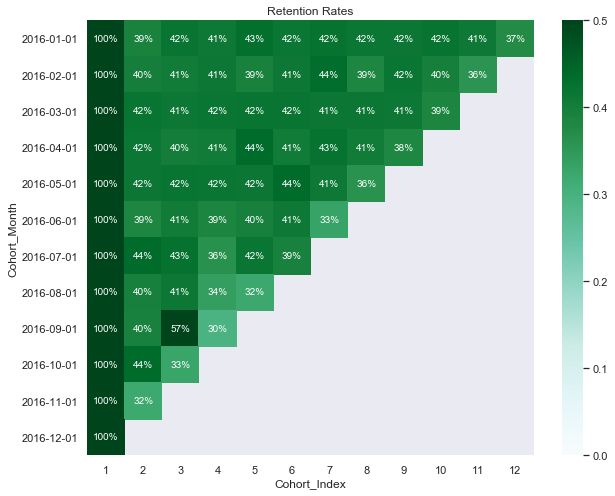

In [292]:
plt.figure(figsize=(10, 8))
plt.title('Retention Rates')
ticks = [item.date() for item in cohort_sizes.index.tolist()] # remove the hours
sns.heatmap(data = retention, 
            yticklabels = ticks,
            annot = True, 
            fmt = '.0%', 
            vmin = 0.0, 
            vmax = 0.5,
            cmap = 'BuGn')
plt.axis('tight')
plt.show()

Average Amount

In [293]:
# Other metrics

grouping = df.groupby(['Cohort_Month', 'Cohort_Index'])
cohort_data = grouping['Amount'].mean()

cohort_data = cohort_data.reset_index()
average_amount = cohort_data.pivot(index = 'Cohort_Month', 
                                   columns = 'Cohort_Index', 
                                   values = 'Amount')
average_amount.round(1)


Cohort_Index,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,
2016-01-01,126.1,125.8,128.0,126.0,196.6,200.7,194.6,200.4,674.3,694.8,684.0,683.7
2016-02-01,128.9,136.5,129.5,195.5,199.7,195.1,198.3,682.7,674.4,693.4,709.0,NaN
2016-03-01,126.3,123.4,193.8,201.9,199.4,191.9,673.9,705.1,711.0,682.0,NaN,NaN
2016-04-01,127.1,199.2,195.8,196.9,194.7,703.4,671.6,705.0,688.4,NaN,NaN,NaN
2016-05-01,188.5,198.6,205.3,195.9,682.5,689.6,711.5,709.3,NaN,NaN,NaN,NaN
2016-06-01,194.3,190.4,207.3,661.1,666.1,674.6,712.0,NaN,NaN,NaN,NaN,NaN
2016-07-01,199.8,204.3,548.6,755.8,569.9,677.9,NaN,NaN,NaN,NaN,NaN,NaN
2016-08-01,197.7,668.7,699.1,697.1,589.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-09-01,633.1,618.1,684.6,719.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


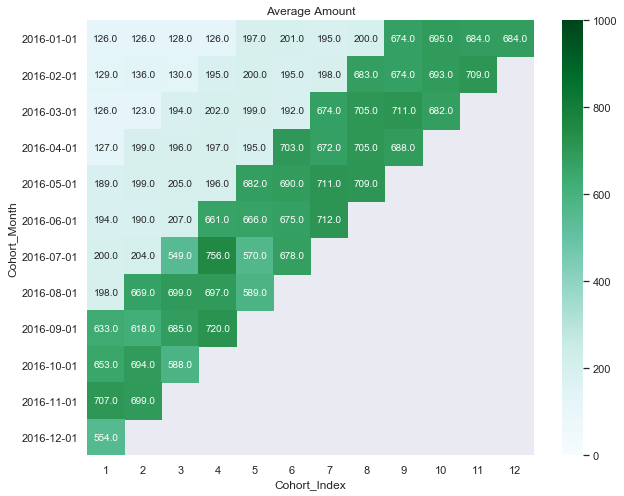

In [294]:
plt.figure(figsize=(10, 8))
plt.title('Average Amount')
ticks = [item.date() for item in cohort_sizes.index.tolist()] # remove the hours
sns.heatmap(data = average_amount.round(), 
            yticklabels = ticks,
            annot = True, 
            fmt = '', 
            vmin = 0.0, 
            vmax = 1000.0,
            cmap = 'BuGn')
plt.axis('tight')
plt.show()

While customer retention rate remains relatively constant, there is an increase in sales towards Christmas.

To identify segments in the data, I will use several different methods. Namely, 

- RFMT analysis, 
- K-Means clustering, 
    - Snake Plots, 
    - Relative Importance of Segment Attributes heatmap, 
    - Silhouette Analysis.

## 4. RFMT Analysis

- RFMT stands for Recency, Frequency, Monetary Value and Tenure.  
- Recency measures how recent the last transaction of each customer is.  
- Frequency measures how many transactions each customer did in the last year.  
- Monetary Value measures the amount each customer spent in the last year.
- Tenure measures how much time passed since the first transaction of each customer.

Let's build the RFM table:

In [295]:
# first check the start and end dates of the 'Inv_Date' column
print('Start Date: {}; End Date: {}'.format(min(df.Inv_Date), max(df.Inv_Date)))

Start Date: 2016-01-01 00:00:00; End Date: 2016-12-26 00:00:00


Introduce Snapshot date

In [296]:
snapshot_date = max(df.Inv_Date) + dt.timedelta(days = 1)
print(snapshot_date)

2016-12-27 00:00:00


### Calculating RFMT metrics

I will build a new DataFrame, RFMT_df. For each customer, 
1. I will calculate days passed between snapshot_date and last purchase (Recency),
2. count invoices for frequency metric (Frequency),
3. sum all the spent amount (Monetary Value),
4. calculate days passed between snapshot_date and first purchase (Tenure) 

I can not aggregate and change the column names at the same time, so I will go step by step.


In [297]:
# calculate RFM metrics by aggregating df and saving to agg_df
agg_df = df.groupby(['Cust_ID']).agg({'Inv_Date' : lambda x : (snapshot_date - x.max()).days,
                                     'Inv_No' : 'count',
                                     'Amount' : 'sum',
                                     'Inv_Month': lambda x: (snapshot_date - x.min()).days})

# change the column names to RFM
agg_df.rename(columns = {'Inv_Date' : 'Recency',
                        'Inv_No' : 'Frequency',
                        'Amount' : 'Monetary_Value',
                        'Inv_Month': 'Tenure'}, inplace = True)

#change name of agg_df to RFM_table
RFMT_table = agg_df

RFMT_table.head()

,Recency,Frequency,Monetary_Value,Tenure
Cust_ID,,,,
2561,54,4,3516.27,361
2562,15,6,1239.98,270
2563,22,6,1916.68,361
2564,6,9,4339.82,301
2565,163,5,967.33,330


Note that a low recency value is better. It shows that the customer has been to the company recently.

### Building RFMT Segments and RFMT Score

Here, I will segment the customers into 4 equal size quartiles, and calculate a score for each customer based on the quartile.

In [298]:
# building recency quartile
r_labels = range(4, 0, -1)
r_quartiles = pd.qcut(RFMT_table['Recency'], 4, labels = r_labels)
RFMT_table = RFMT_table.assign(R_qrtl = r_quartiles.values)

RFMT_table.head()

,Recency,Frequency,Monetary_Value,Tenure,R_qrtl
Cust_ID,,,,,
2561,54,4,3516.27,361,2
2562,15,6,1239.98,270,4
2563,22,6,1916.68,361,3
2564,6,9,4339.82,301,4
2565,163,5,967.33,330,1


In [299]:
# building frequency and monetary value quartiles
f_labels = range(1, 5) 
mv_labels = range(1, 5)
t_labels = range(1, 5) #should be 1 less than the bin size in qcut argument, note duplicates

f_quartiles = pd.qcut(RFMT_table['Frequency'], 4, labels = f_labels) #, duplicates='drop') 
mv_quartiles = pd.qcut(RFMT_table['Monetary_Value'], 4, labels = mv_labels)
t_quartiles = pd.qcut(RFMT_table['Tenure'], 6, labels = t_labels, duplicates='drop') 

RFMT_table = RFMT_table.assign(F_qrtl = f_quartiles.values)
RFMT_table = RFMT_table.assign(M_qrtl = mv_quartiles.values)
RFMT_table = RFMT_table.assign(T_qrtl = t_quartiles.values)

RFM_table.head()

,Recency,Frequency,Monetary_Value,Tenure,R_qrtl,F_qrtl,M_qrtl,T_qrtl
Cust_ID,,,,,,,,
2561,54,4,3516.27,361,2,1,4,4
2562,15,6,1239.98,270,4,2,2,1
2563,22,6,1916.68,361,3,2,3,4
2564,6,9,4339.82,301,4,4,4,2
2565,163,5,967.33,330,1,1,1,3


Build RFMT Segment and RFMT Score

In [300]:
def str_rfm(x): 
    return str(x['R_qrtl']) + str(x['F_qrtl']) + str(x['M_qrtl']) + str(x['T_qrtl'])

RFMT_table['RFMT_Segment'] = RFMT_table.apply(str_rfm, axis = 1)
RFMT_table['RFMT_Score'] = RFMT_table[['R_qrtl', 'F_qrtl', 'M_qrtl', 'T_qrtl']].sum(axis=1)

RFMT_table.head()

,Recency,Frequency,Monetary_Value,Tenure,R_qrtl,F_qrtl,M_qrtl,T_qrtl,RFMT_Segment,RFMT_Score
Cust_ID,,,,,,,,,,
2561,54,4,3516.27,361,2,1,4,4,2144,11.0
2562,15,6,1239.98,270,4,2,2,1,4221,9.0
2563,22,6,1916.68,361,3,2,3,4,3234,12.0
2564,6,9,4339.82,301,4,4,4,2,4442,14.0
2565,163,5,967.33,330,1,1,1,3,1113,6.0


### Analyzing RFMT Table

In [301]:
# 10 largest segments
RFMT_table.groupby('RFMT_Segment').size().sort_values(ascending = False)[:10]

RFMT_Segment
1114    544
1111    479
4444    436
1113    403
3444    305
1112    248
2111    187
2121    187
4344    186
3334    181
dtype: int64

Lets examine the segment with the best RFMT Score of 16.0):  

In [302]:
RFMT_table[RFMT_table['RFMT_Segment'] == '4444'][:5]

,Recency,Frequency,Monetary_Value,Tenure,R_qrtl,F_qrtl,M_qrtl,T_qrtl,RFMT_Segment,RFMT_Score
Cust_ID,,,,,,,,,,
2573,10,10,4247.88,361,4,4,4,4,4444,16.0
2583,7,10,2967.21,361,4,4,4,4,4444,16.0
2590,10,11,5579.59,361,4,4,4,4,4444,16.0
2596,13,10,4565.84,361,4,4,4,4,4444,16.0
2610,16,15,6429.72,361,4,4,4,4,4444,16.0


### Summary Metrics

In [303]:
RFMT_table.groupby('RFMT_Score').agg({'Recency' : 'mean',
                                   'Frequency' : 'mean',
                                   'Monetary_Value' : ['mean', 'count'],
                                   'Tenure': ['mean']}).round(1)

Recency Frequency Monetary_Value       Tenure
              mean      mean           mean count   mean
RFMT_Score                                              
4.0          143.7       2.6          487.7   479  226.3
5.0          112.8       3.4          762.7   558  251.6
6.0          106.6       3.8          922.9   978  278.1
7.0          102.9       4.1         1013.1  1370  304.8
8.0           65.7       4.9         1473.9  1328  302.5
9.0           56.3       5.4         1720.4  1518  313.3
10.0          48.6       6.1         1975.6  1495  322.1
11.0          41.6       6.8         2266.1  1481  328.4
12.0          36.2       7.5         2571.1  1479  335.1
13.0          28.4       8.1         2940.3  1327  341.5
14.0          22.7       9.0         3375.4  1151  347.5
15.0          15.6       9.7         3742.5   804  355.2
16.0           8.4      10.7         4389.9   436  361.0

### Gold and Silver customers

In [338]:
def invite_members(dtf):
    if dtf['RFMT_Score'] >= 12:
        return '1.Gold'
    else:
        return '2.Silver'
    
RFMT_table['Member_Segment'] = RFMT_table.apply(invite_members, axis = 1)
RFMT_table.groupby('Member_Segment').agg({'Recency' : 'mean',
                                        'Frequency' : 'mean',
                                        'Monetary_Value' : ['mean', 'count'],
                                        'Tenure' : 'mean'}).round(1)


Recency Frequency Monetary_Value       Tenure
                  mean      mean           mean count   mean
Member_Segment                                              
1.Gold            25.7       8.6         3177.3  5197  344.8
2.Silver          74.3       5.0         1501.9  9207  302.3

### Gold, Silver and Bronze customers

In [339]:
def invite_members(dtf):
    if dtf['RFMT_Score'] >= 12:
        return '1.Gold'
    elif dtf['RFMT_Score'] >= 9:
        return '2.Silver'
    else:
        return '3.Bronze'
    
RFMT_table['Member_Segment'] = RFMT_table.apply(invite_members, axis = 1)
RFMT_table.groupby('Member_Segment').agg({'Recency' : 'mean',
                                        'Frequency' : 'mean',
                                        'Monetary_Value' : ['mean', 'count'],
                                        'Tenure' : 'mean'}).round(1)


Recency Frequency Monetary_Value       Tenure
                  mean      mean           mean count   mean
Member_Segment                                              
1.Gold            25.7       8.6         3177.3  5197  344.8
2.Silver          48.9       6.1         1985.1  4494  321.2
3.Bronze          98.5       4.0         1041.2  4713  284.3

The first segment remains the same in both solutions. The second segment of the 2-segment solution gives birth to 2 other segments in the 3-segment solution. 

## 5. K-means clustering

K-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster. 

### Data preprocessing

To be able to do K-means clustering, we need make sure that the variables are symmetrically distributed (i.e. not skewed), and they have the same mean and variance. Let's check our variables:

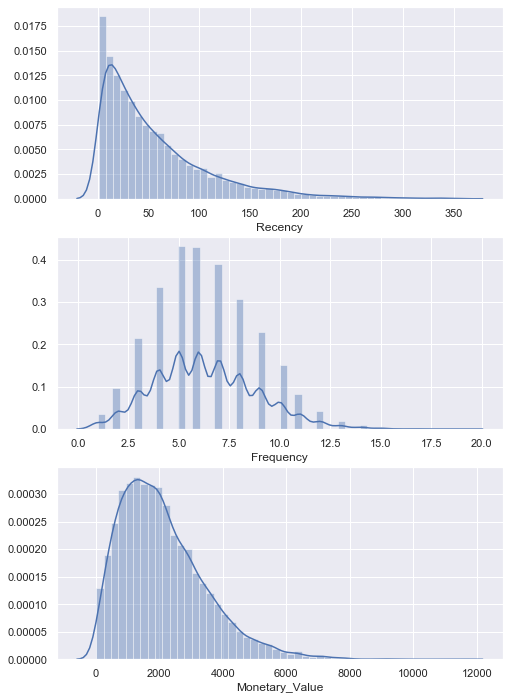

In [305]:
# checking the distributions
sns.set(style = 'darkgrid')

plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1); sns.distplot(RFMT_table['Recency'])
plt.subplot(3, 1, 2); sns.distplot(RFMT_table['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(RFMT_table['Monetary_Value'])

plt.show()

In [306]:
RFMT_table[['Recency', 'Frequency', 'Monetary_Value']].describe()

,Recency,Frequency,Monetary_Value
count,14404.000000,14404.000000,14404.000000
mean,56.743266,6.329700,2106.415806
std,54.842904,2.523585,1350.573898
min,1.000000,1.000000,20.030000
25%,17.000000,5.000000,1099.515000
50%,40.000000,6.000000,1871.580000
75%,79.000000,8.000000,2860.025000
max,357.000000,19.000000,11579.080000


The Recency, Frequency and Monetary Value plots show that the variables are not symmetrically distrubuted. All of the plots are right skewed. In addition, summary statistics show that the variables have different means and variances. To mitigate, first, I will use the log transformation to unskew the data. Second, I will standardize to the same mean and scale to the same standard deviation. 

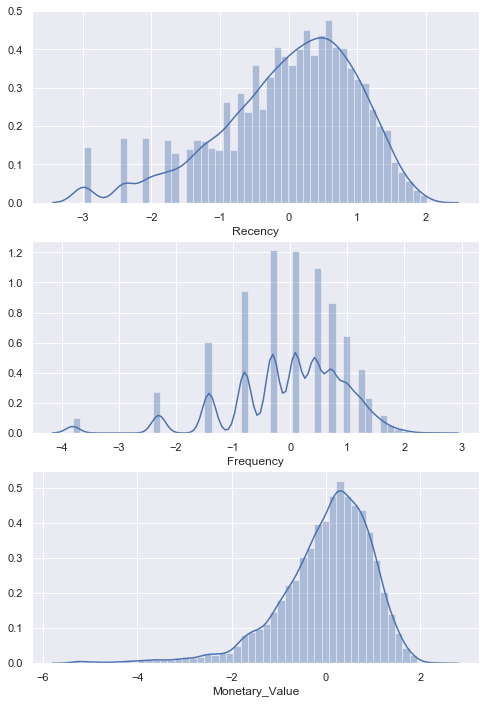

,Recency,Frequency,Monetary_Value
count,1.440400e+04,1.440400e+04,1.440400e+04
mean,-5.440124e-17,7.571777e-16,-5.279571e-16
std,1.000035e+00,1.000035e+00,1.000035e+00
min,-2.984293e+00,-3.807992e+00,-5.392941e+00
25%,-5.738345e-01,-3.112319e-01,-4.863011e-01
50%,1.541542e-01,8.489076e-02,1.652976e-01
75%,7.331723e-01,7.099259e-01,6.847591e-01
max,2.016403e+00,2.589271e+00,2.397773e+00


In [307]:
# log transformation in only the RFM variables
RFM_only = RFMT_table[['Recency','Frequency','Monetary_Value']]
RFM_log = np.log(RFM_only)

# standardize and scale
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(RFM_log)
RFM_norm = scaler.transform(RFM_log)

# RFM_normalized became numpy.ndarray object after this process, build back a df to check
RFM_normalized = pd.DataFrame(data = RFM_norm, 
                              index = RFM_only.index, 
                              columns = RFM_only.columns)

plt.figure(figsize=(8, 12))
plt.subplot(3, 1, 1); sns.distplot(RFM_normalized['Recency'])
plt.subplot(3, 1, 2); sns.distplot(RFM_normalized['Frequency'])
plt.subplot(3, 1, 3); sns.distplot(RFM_normalized['Monetary_Value'])

plt.show()

RFM_normalized.describe()

Now that the data is preprocessed, I can start clustering by using the Elbow criterion method to select a good value for k. I will plot the number of clusters (k) against within-cluster-sum-of-squared-errors (SSE), i.e. sum of squared distances from every data point to its cluster center. The elbow point in the plot (where the decrease in SSE slows down) and the next point are good candidates for the best k. 

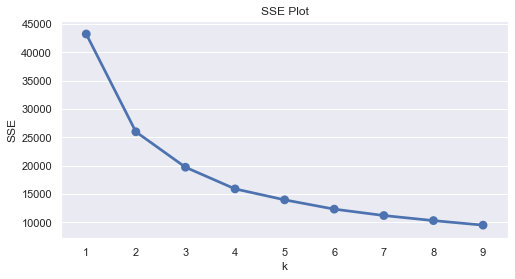

In [308]:
from sklearn.cluster import KMeans

# try k values from 1 to 9 and calculate their SSE
SSE = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    kmeans.fit(RFM_normalized)
    SSE[k] = kmeans.inertia_

# SSE plot
plt.title('SSE Plot')
plt.xlabel('k')
plt.ylabel('SSE')
sns.pointplot(x = list(SSE.keys()), y = list(SSE.values()))
plt.show()

The elbow lies at k = 2. I will also try k = 3 and k = 4.

In [309]:
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(RFM_normalized)
cluster_labels = kmeans.labels_

# add new column
RFM_table_k3 = RFMT_table.assign(Cluster = cluster_labels)

# calculate RFM for clusters
RFM_table_k3.groupby(['Cluster']).agg({'Recency' : 'mean',
                                      'Frequency' : 'mean',
                                      'Monetary_Value' : ['mean', 'count']}).round(0)



Recency Frequency Monetary_Value      
           mean      mean           mean count
Cluster                                       
0         112.0       3.0          699.0  3126
1          10.0       8.0         2972.0  4035
2          59.0       7.0         2232.0  7243

With k=3, the Frequency and Monetary Value of Clusters 0 and 2 seemed somewhat close.

In [310]:
kmeans = KMeans(n_clusters = 4, random_state = 1)
kmeans.fit(RFM_normalized)
cluster_labels = kmeans.labels_

# add new column
RFM_table_k4 = RFMT_table.assign(Cluster = cluster_labels)

# calculate RFM for clusters
RFM_table_k4.groupby(['Cluster']).agg({'Recency' : 'mean',
                                      'Frequency' : 'mean',
                                      'Monetary_Value' : ['mean', 'count']}).round(0)


Recency Frequency Monetary_Value      
           mean      mean           mean count
Cluster                                       
0           7.0       7.0         2699.0  2966
1         143.0       3.0          394.0  1331
2          76.0       5.0         1335.0  4984
3          45.0       8.0         2959.0  5123

The Frequency and Monetary Value of Clusters 0 and 3 seem very close with k=4. 

In [311]:
kmeans = KMeans(n_clusters = 2, random_state = 1)
kmeans.fit(RFM_normalized)
cluster_labels = kmeans.labels_

# add new column
RFM_table_k2 = RFMT_table.assign(Cluster = cluster_labels)

# calculate RFM for clusters
RFM_table_k2.groupby(['Cluster']).agg({'Recency' : 'mean',
                                      'Frequency' : 'mean',
                                      'Monetary_Value' : ['mean', 'count']}).round(0)


Recency Frequency Monetary_Value      
           mean      mean           mean count
Cluster                                       
0         101.0       4.0          952.0  4994
1          34.0       8.0         2719.0  9410

- Here, the clusters are far more distinct and this clustering is more simple. But cluster 1 is almost double the size of cluster 0 but K-Means clustering favors k=2. 
- However, k=3 clusters is still an option to balance the simplicity and gaining more insights. This is also in line with the RFM analysis. 
- To verify and visualize the number of K-Means clusters, I used snake plots, relative importance of segment attributes and silhouette analysis.

### 5.1. Snake plots

I will use snakeplots to visualize the clustering. To do this, I first need to transform RFM_normalized back to a DataFrame structure which became a numpy ndarray object after scaling. Second, I will add a cluster column and melt the data for easier plotting. 

In [330]:
# transform back to df
RFM_df_k2 = pd.DataFrame(RFM_normalized, index = RFM_table.index, columns = RFM_table.columns)

# add 'Cluster' column
RFM_df_k2['Cluster'] = RFM_table_k2['Cluster']

# melt into long format
RFM_melt_k2 = pd.melt(RFM_df_k2.reset_index(),
                  id_vars = ['Cust_ID', 'Cluster'],
                  value_vars = ['Recency', 'Frequency', 'Monetary_Value'], # melt these
                  var_name = 'Attribute', # into this
                  value_name = 'Value')

# check the resulting df
RFM_melt_k2.head()

,Cust_ID,Cluster,Attribute,Value
0,2561,1,Recency,0.409479
1,2562,1,Recency,-0.680322
2,2563,1,Recency,-0.354477
3,2564,1,Recency,-1.459889
4,2565,0,Recency,1.349399


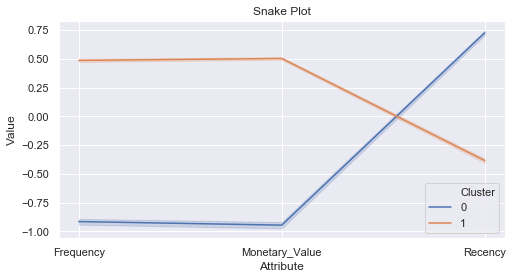

In [331]:
# plot
plt.title('Snake Plot')
sns.lineplot(x = 'Attribute',
            y = 'Value',
            hue = 'Cluster',
            data = RFM_melt_k2)
plt.show()

In [332]:
# transform back to df
RFM_df_k3 = pd.DataFrame(RFM_normalized, index = RFM_table.index, columns = RFM_table.columns)

# add 'Cluster' column
RFM_df_k3['Cluster'] = RFM_table_k3['Cluster']

# melt into long format
RFM_melt_k3 = pd.melt(RFM_df_k3.reset_index(),
                  id_vars = ['Cust_ID', 'Cluster'],
                  value_vars = ['Recency', 'Frequency', 'Monetary_Value'], # melt these
                  var_name = 'Attribute', # into this
                  value_name = 'Value')

# check the resulting df
RFM_melt_k3.head()

,Cust_ID,Cluster,Attribute,Value
0,2561,2,Recency,0.409479
1,2562,1,Recency,-0.680322
2,2563,2,Recency,-0.354477
3,2564,1,Recency,-1.459889
4,2565,0,Recency,1.349399


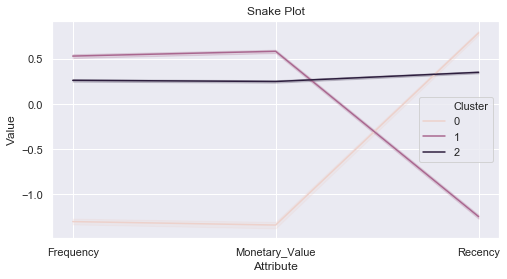

In [333]:
# plot
plt.title('Snake Plot')
sns.lineplot(x = 'Attribute',
            y = 'Value',
            hue = 'Cluster',
            data = RFM_melt_k3)
plt.show()

Snake plots are a visual way to identify / verify clusters. Here, there is some overlap with 3 clusters.

### 5.2. Relative Importance of Segment Attributes

Next, for k=2 and k=3, I will look at the relative importance of segment attributes as a proportion of cluster average to population average.

In [322]:
RFM_cluster_k2 = RFM_table_k2[['Recency', 'Frequency', 'Monetary_Value', 'Cluster']]
RFM_pop_k2 = RFM_table[['Recency', 'Frequency', 'Monetary_Value']]

cluster_avg_k2 = RFM_cluster_k2.groupby(['Cluster']).mean()
print('Cluster Average:')
cluster_avg_k2

Cluster Average:


,Recency,Frequency,Monetary_Value
Cluster,,,
0,100.504606,4.101722,951.994451
1,33.518597,7.512115,2719.081082


In [323]:
population_avg_k2 = RFM_pop_k2.mean()
print('\n Population Average:')
population_avg_k2


 Population Average:


Recency             56.743266
Frequency            6.329700
Monetary_Value    2106.415806
dtype: float64

In [324]:
relative_importance_k2 = cluster_avg_k2 / population_avg_k2 -1 
# subtracting 1 ensures 0 is returned when means are the same
print('\n Relative Importance:')
relative_importance_k2.round(2)


 Relative Importance:


,Recency,Frequency,Monetary_Value
Cluster,,,
0,0.77,-0.35,-0.55
1,-0.41,0.19,0.29


Populating the interactive namespace from numpy and matplotlib


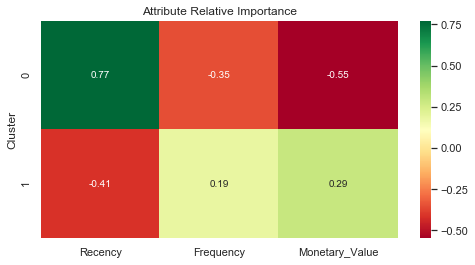

In [325]:
# Plot heatmap for easier interpretation
%pylab inline

plt.figure(figsize(8, 4))
plt.title('Attribute Relative Importance')
sns.heatmap(data = relative_importance_k2, 
            annot = True,
           fmt = '.2f',
           cmap = 'RdYlGn')
plt.axis('tight')
plt.show()

In [326]:
RFM_cluster_k3 = RFM_table_k3[['Recency', 'Frequency', 'Monetary_Value', 'Cluster']]
RFM_pop_k3 = RFM_table[['Recency', 'Frequency', 'Monetary_Value']]

cluster_avg_k3 = RFM_cluster_k3.groupby(['Cluster']).mean()
print('Cluster Average:')
cluster_avg_k3


Cluster Average:


,Recency,Frequency,Monetary_Value
Cluster,,,
0,111.551184,3.427703,699.485621
1,10.143247,7.756382,2971.567675
2,59.049151,6.787381,2231.664455


In [327]:
population_avg_k3 = RFM_pop_k3.mean()
print('\n Population Average:')
population_avg_k3


 Population Average:


Recency             56.743266
Frequency            6.329700
Monetary_Value    2106.415806
dtype: float64

In [328]:
relative_importance_k3 = cluster_avg_k3 / population_avg_k3 -1 
# subtracting 1 ensures 0 is returned when means are the same
print('\n Relative Importance:')
relative_importance_k3.round(2)


 Relative Importance:


,Recency,Frequency,Monetary_Value
Cluster,,,
0,0.97,-0.46,-0.67
1,-0.82,0.23,0.41
2,0.04,0.07,0.06


Populating the interactive namespace from numpy and matplotlib


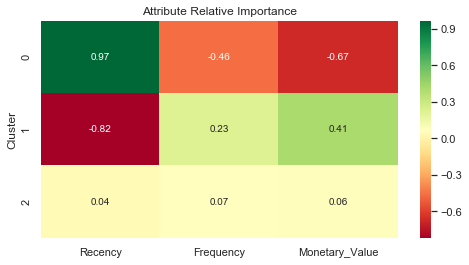

In [329]:
# Plot heatmap for easier interpretation
%pylab inline

plt.figure(figsize(8, 4))
plt.title('Attribute Relative Importance')
sns.heatmap(data = relative_importance_k3, 
            annot = True,
           fmt = '.2f',
           cmap = 'RdYlGn')
plt.axis('tight')
plt.show()

The further a ratio is from 0, the more important that attribute is for defining a specific cluster compared to the population average. So, the Relative Importance of Segment Attributes method indicates none of the attributes are important for defining Cluster 2 compared to the population average. 

### 5.3. Silhouette Analysis

Finally, I will look at the silhouette scores to verify the clustering. This is a method that measures how well each datapoint $x_i$ "fits" its assigned cluster and also how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the average distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$  

The silhouette score is computed on every datapoint in every cluster. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

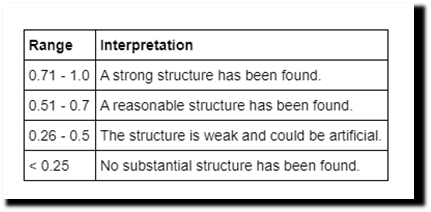

For n_clusters = 2 The average silhouette_score is : 0.3661199001817455


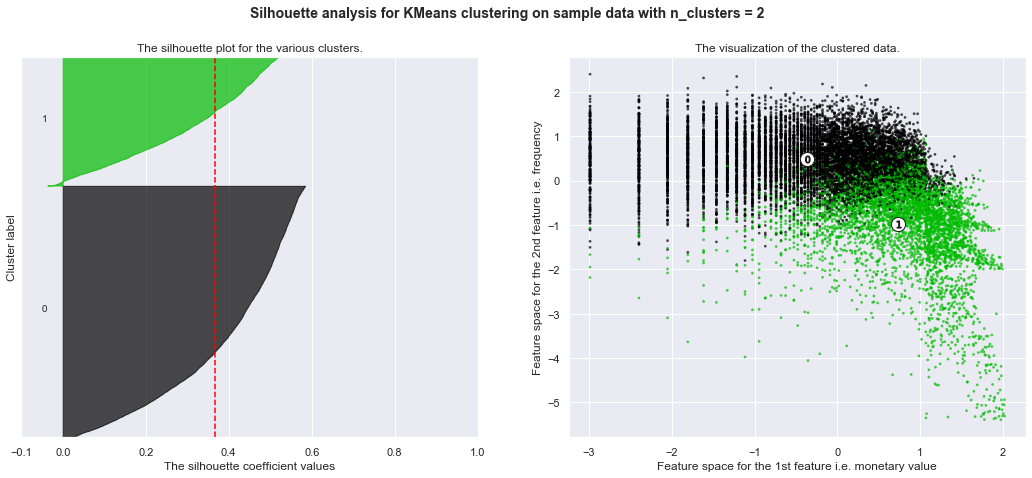

For n_clusters = 3 The average silhouette_score is : 0.299569051899056


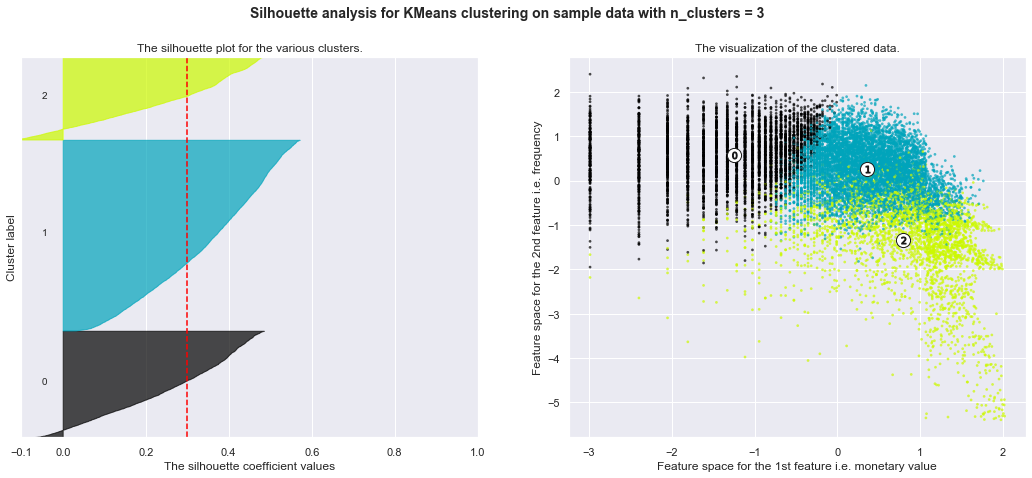

For n_clusters = 4 The average silhouette_score is : 0.285594505013269


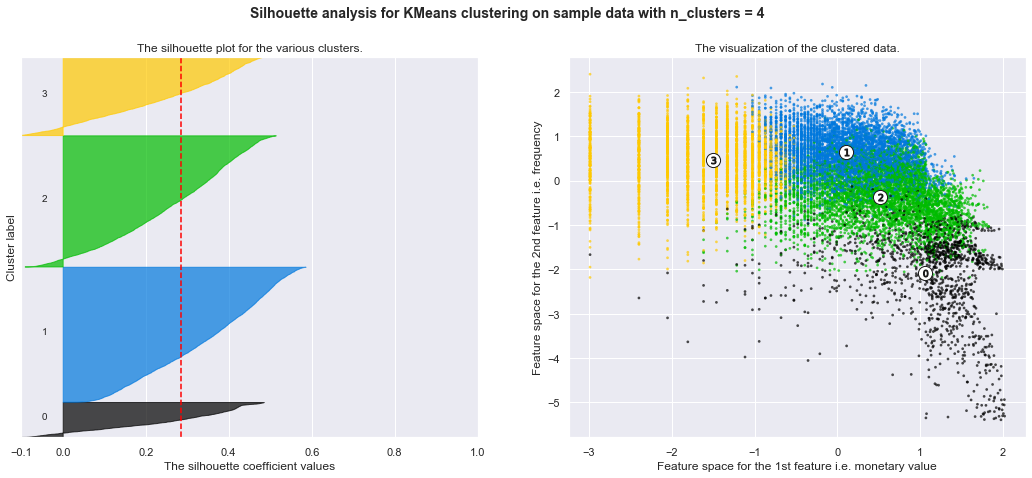

In [318]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

X = RFM_norm

cluster_centers = {}

for n_clusters in range(2,5):
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    cluster_centers.update({n_clusters :{
                                        'cluster_center':clusterer.cluster_centers_,
                                        'silhouette_score':silhouette_avg,
                                        'labels':cluster_labels}
                           })
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
    y_lower = 10
    
    for i in range(n_clusters):
        
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    
    
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    feature1 = 0
    feature2 = 2
    ax2.scatter(X[:, feature1], X[:, feature2], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, feature1], centers[:, feature2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    
    for i, c in enumerate(centers):
        ax2.scatter(c[feature1], c[feature2], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature i.e. monetary value")
    ax2.set_ylabel("Feature space for the 2nd feature i.e. frequency")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    
    plt.show()

Best silhouette score was obtained with n-clusters=2. However, according to the criteria for the silhouette coefficient score of around 0.37, the structure is weak and could be artificial.

## 6. Conclusion

Overall, we used several methods to do, verify and visualize customer segmentation:

    - RFMT Analysis,  
    - K-Means clustering,  
        - Snake Plots,  
        - Relative Importance of Segment Attributes,
        - Silhouette scores.  
  
- All methods clearly identified two clusters in the data.  
- While favoring 2 clusters, a 3 clusters option was also possible in all methods.   
- Through RFMT Analysis, I was able to perform a fair segmentation into 3 almost equally distanced clusters in terms of RFMT and size of each clusters.
- For better capturing customer behavior and more focused marketing targeting diverse customers, I would suggest using a 3-clustered customer segmentation pending managerial decision.